In [1]:
import ee
import pandas as pd
import wxee
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xee
import xarray as xr

# Processing Script

In [2]:
def nexgddpcmip6_processing(year_start, year_end, variable, scenario ):
    model_list = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2',
                  'CNRM-CM6-1', 'CNRM-ESM2-1', 'CanESM5', 'EC-Earth3', 'EC-Earth3-Veg-LR', 'FGOALS-g3', 'GFDL-CM4',
                  'GFDL-ESM4', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0',
                  'IPSL-CM6A-LR', 'KACE-1-0-G', 'KIOST-ESM', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR',
                  'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']
    scenario_list = ['historical', 'ssp245', 'ssp585']

    # Trigger the authentication flow.
    ee.Authenticate()

    # Initialize the library.
    ee.Initialize(project='ee-mailemsasaki')
    
    # Import NEX-GDDP-CMIP6
    nexgddp = ee.ImageCollection("NASA/GDDP-CMIP6")

    # Dates
    i_date = str(year_start) + '-01-01'
    f_date = str(year_end)   + '-12-31'
    
    # Picking out the Illinois region
    illinois = ee.Geometry.Rectangle([267.2,36,274,43.5])

    dataset_list = []
    for model in model_list:
        if model == 'GFDL-CM4':
            nexgddp_filtered = (nexgddp.select(variable).filterDate(i_date, f_date)
                     .filter(ee.Filter.eq('model',model)).filter(ee.Filter.eq('scenario',scenario))
                                .filter(ee.Filter.eq('grid_label','gr1')))
        else:
            # Filtering out the dataset we want
            nexgddp_filtered = (nexgddp.select(variable).filterDate(i_date, f_date)
                         .filter(ee.Filter.eq('model',model)).filter(ee.Filter.eq('scenario',scenario)))
        if nexgddp_filtered.size().getInfo() > 0:
            filtered_dataset = xr.open_dataset(nexgddp_filtered, engine='ee', scale=0.25, geometry=illinois,
                                                 projection=nexgddp_filtered.first().select(0).projection(),
                                                 use_cftime=True, fast_time_slicing=True)
            filtered_dataset['model'] = model
            print(model)
            filtered_dataset.load()
            dataset_list.append(filtered_dataset)
    
    dataset = xr.concat(dataset_list, dim='model', coords='minimal', compat='override')
    
    # Changing from -180-180 to 0-360 longitude scale
    dataset = dataset.assign_coords({"lon":dataset.lon%360})
    
    return dataset

In [3]:
test_nexgddp = nexgddpcmip6_processing(2015,2100,'sfcWind','ssp585')

ACCESS-CM2
ACCESS-ESM1-5
BCC-CSM2-MR
CESM2
CESM2-WACCM
CMCC-CM2-SR5
CMCC-ESM2
CNRM-CM6-1
CNRM-ESM2-1
CanESM5
EC-Earth3
EC-Earth3-Veg-LR
FGOALS-g3
GFDL-CM4
GFDL-ESM4
GISS-E2-1-G
HadGEM3-GC31-LL
HadGEM3-GC31-MM
IITM-ESM
INM-CM4-8
INM-CM5-0
IPSL-CM6A-LR
KACE-1-0-G
KIOST-ESM
MIROC-ES2L
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NESM3
NorESM2-LM
NorESM2-MM
TaiESM1
UKESM1-0-LL


In [4]:
test_nexgddp

<xarray.Dataset>
Dimensions:  (time: 31410, lon: 27, lat: 30, model: 34)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2100-12-30
  * lon      (lon) float64 267.3 267.6 267.8 268.1 ... 273.1 273.3 273.6 273.8
  * lat      (lat) float64 43.43 43.18 42.93 42.68 ... 36.93 36.68 36.43 36.18
  * model    (model) <U16 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    sfcWind  (model, time, lon, lat) float32 3.755 3.826 3.739 ... 3.137 3.04
Attributes:
    crs:      EPSG:4326

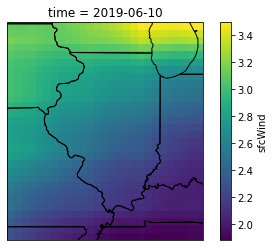

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
test_nexgddp.sfcWind.sel(time='2019-06-10').mean('model').plot.pcolormesh(x='lon',y='lat')
#ax.set_extent([-91,-87.73,37.02,42.52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)

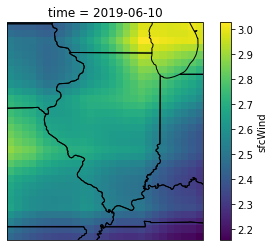

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
test_nexgddp.sfcWind.sel(time='2019-06-10').mean('model').plot.pcolormesh(x='lon',y='lat')
#ax.set_extent([-91,-87.73,37.02,42.52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)

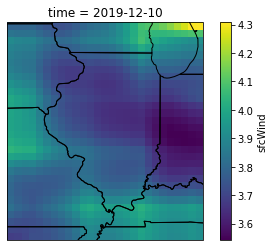

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
test_nexgddp.sfcWind.sel(time='2019-12-10').mean('model').plot.pcolormesh(x='lon',y='lat')
#ax.set_extent([-91,-87.73,37.02,42.52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)

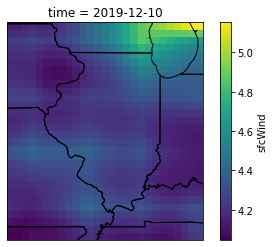

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
test_nexgddp.sfcWind.sel(time='2019-12-10').mean('model').plot.pcolormesh(x='lon',y='lat')
#ax.set_extent([-91,-87.73,37.02,42.52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)

# Google Earth Engine - XEE

In [2]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='ee-mailemsasaki')

In [8]:
# Import the MODIS land cover collection.
nexgddp = ee.ImageCollection("NASA/GDDP-CMIP6")
nexgddp

In [46]:
print(nexgddp.first().propertyNames().removeAll(['system:time_start','system:index','isodate']).getInfo())

['month', 'scenario', 'year', 'system:footprint', 'system:time_end', 'system:version', 'system:id', 'model', 'system:asset_size', 'day', 'system:bands', 'system:band_names']


In [13]:
nexgddp

TypeError: Filter.eq() missing 1 required positional argument: 'value'

In [14]:
# Picking intial and end dates
i_date = '2017-06-01'

f_date = '2018-06-04'

#nexgddp_wind = nexgddp.select('sfcWind').filterDate(i_date, f_date)

In [20]:
# Picking out the Illinois Region
illinois = ee.Geometry.Rectangle([267.2,36,274,43.5])
#illinois = ee.Geometry.Rectangle(-91.6,42.6,-87.5,36.9)

# Filtering the dataset we want
wind_illinois = (ee.ImageCollection("NASA/GDDP-CMIP6").select('sfcWind').filterDate(i_date, f_date)
                 .filter(ee.Filter.eq('model','ACCESS-CM2')).filter(ee.Filter.eq('scenario','ssp245')))
#wind_illinois = nexgddp_wind.getRegion(illinois, 25000)

In [21]:
# Opening the dataset
wind_illinois_array = xr.open_dataset(wind_illinois, engine='ee', scale=0.25, geometry=illinois,
                                     projection=wind_illinois.first().select(0).projection())
wind_illinois_array

<xarray.Dataset>
Dimensions:  (time: 368, lon: 27, lat: 30)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-01 2017-06-02 ... 2018-06-03
  * lon      (lon) float64 -92.68 -92.43 -92.18 -91.93 ... -86.68 -86.43 -86.18
  * lat      (lat) float64 43.43 43.18 42.93 42.68 ... 36.93 36.68 36.43 36.18
Data variables:
    sfcWind  (time, lon, lat) float32 ...
Attributes:
    crs:      EPSG:4326

In [108]:
# Changing from -180-180 to 0-360 longitude scale
wind_dataarray = wind_illinois_array.sfcWind.assign_coords({"lon":wind_illinois_array.lon%360})

In [110]:
wind_dataarray

<xarray.DataArray 'sfcWind' (time: 368, lon: 27, lat: 30)>
array([[[3.002989, 3.083514, ..., 2.396026, 2.391735],
        [3.055293, 3.127339, ..., 2.355554, 2.341709],
        ...,
        [5.01686 , 4.85514 , ..., 2.552777, 2.394531],
        [5.067325, 4.895859, ..., 2.581004, 2.417129]],

       [[2.060688, 2.124323, ..., 2.14923 , 2.236152],
        [2.096815, 2.168814, ..., 2.17339 , 2.265448],
        ...,
        [3.836228, 3.799168, ..., 2.126127, 2.098911],
        [3.84876 , 3.802753, ..., 2.053426, 2.022054]],

       ...,

       [[3.463192, 3.364504, ..., 1.671412, 1.70227 ],
        [3.460863, 3.362483, ..., 1.625034, 1.657101],
        ...,
        [3.576798, 3.494301, ..., 1.014742, 0.986819],
        [3.49931 , 3.417873, ..., 0.997471, 0.969829]],

       [[4.604117, 4.548358, ..., 1.702484, 1.667856],
        [4.610019, 4.577833, ..., 1.682615, 1.650285],
        ...,
        [3.975487, 4.082277, ..., 2.071834, 2.041609],
        [4.020327, 4.172789, ..., 2.110031, 2.07984 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-06-01 2017-06-02 ... 2018-06-03
  * lon      (lon) float64 267.3 267.6 267.8 268.1 ... 273.1 273.3 273.6 273.8
  * lat      (lat) float64 43.43 43.18 42.93 42.68 ... 36.93 36.68 36.43 36.18
Attributes:
    id:             sfcWind
    data_type:      {'type': 'PixelType', 'precision': 'float'}
    dimensions:     [1441, 600]
    crs:            EPSG:4326
    crs_transform:  [0.25, 0, -180, 0, -0.25, 90]

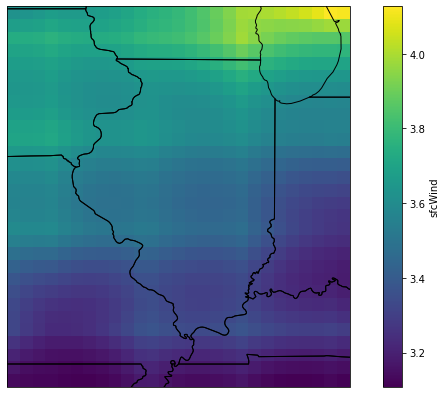

In [100]:
# Full time series mean - ACCESS-CM2 - ssp245 - sfcWind
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
wind_dataarray.mean('time').plot.pcolormesh(x='lon',y='lat')
#ax.set_extent([-91,-87.73,37.02,42.52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)

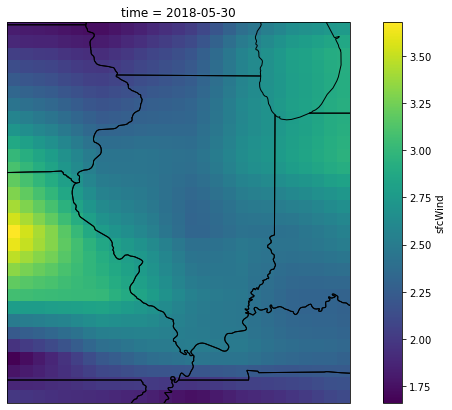

In [114]:
# 2018-05-30 - ACCESS-CM2 - ssp245 - sfcWind
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree())
wind_dataarray.sel(time='2018-05-30').plot.pcolormesh(x='lon',y='lat')
#ax.set_extent([-91,-87.73,37.02,42.52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES)

In [101]:
# Making sure saving to a netcdf works
wind_dataarray.to_netcdf('/data/keeling/a/mailes2/a/NEX-GDDP-CMIP6_ACCESS-CM2_ssp370_illinois.nc')

# WXEE Tutorial

In [5]:
gridmet = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET")

In [6]:
collection = gridmet.filterDate("2020-09-05", "2020-09-11")

In [7]:
# The coordinate reference system to use (NAD83 Albers CONUS)
crs = "EPSG:5070"
# Spatial resolution in CRS units (meters)
scale = 20_000

In [8]:
arr = collection.wx.to_xarray(scale=scale, crs=crs)

Requesting data:   0%|          | 0/6 [00:00<?, ?it/s]

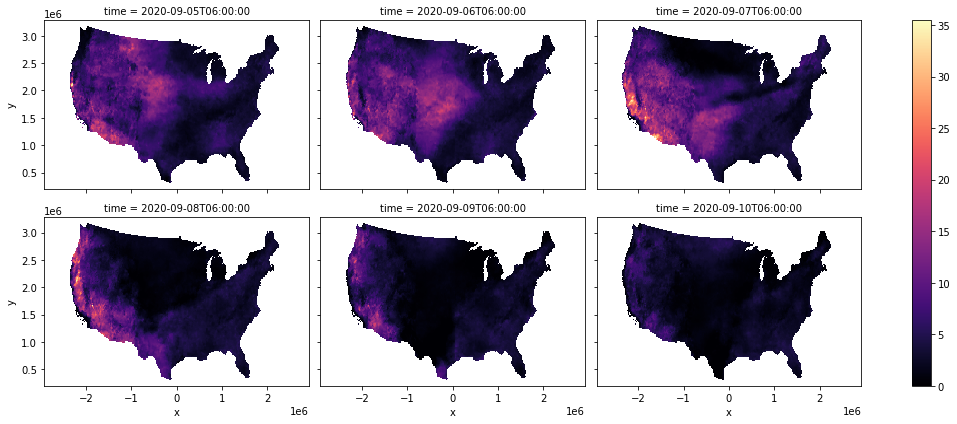

In [9]:
hdw = arr.vs * arr.vpd

hdw.plot(col="time", col_wrap=3, cmap="magma", figsize=(15, 6))

# AWS S3

In [37]:
import s3fs
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import io  # Import the io module

# WXEE

In [100]:
wind_illinois_array = (wind_illinois.select('sfcWind'))
                       #.filterBounds(illinois))
wind_illinois_array = wind_illinois_array.wx.to_xarray(region=illinois, scale=25_000)
#wind_illinois_array = wind_illinois_array.wx.to_time_series()

Requesting data:   0%|          | 0/105 [00:00<?, ?it/s]

KeyboardInterrupt: 